In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha':0.25, 's':80,'linewidths':0}

In [4]:
data = np.load('clusterable_data.npy')

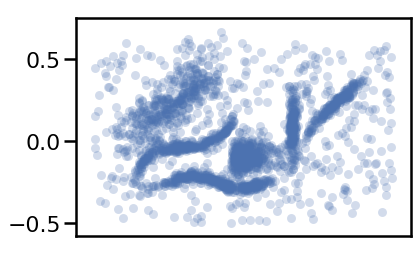

In [5]:
plt.scatter(data.T[0],data.T[1],c='b',**plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_xaxis().set_visible(False)

In [13]:
def plot_clusters(data,algorithm,args,kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep',np.unique(labels).max()+1)
    colors = [palette[x] if x>=0 else (0.0,0.0,0.0) for x in labels]
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)),fontsize = 24)
    plt.text(-0.5,0.7,'Clustering took {:.2f} s'.format(end_time - start_time),fontsize=14)

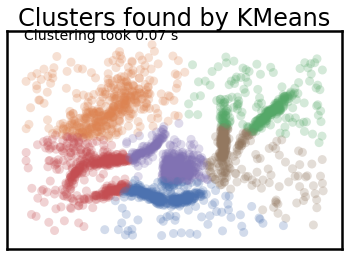

In [14]:
plot_clusters(data, cluster.KMeans, (),{'n_clusters':6})

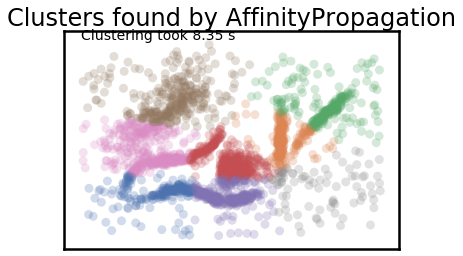

In [16]:
plot_clusters(data, cluster.AffinityPropagation, (),{'preference':-5.0,'damping':0.95})

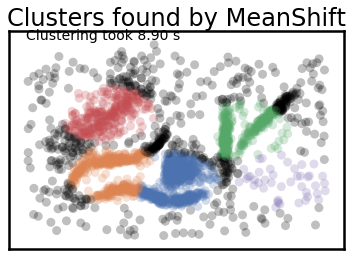

In [17]:
plot_clusters(data, cluster.MeanShift, (0.175,),{'cluster_all':False})

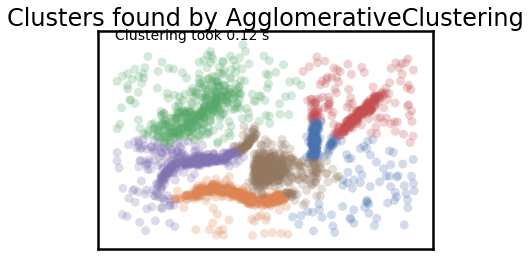

In [18]:
plot_clusters(data, cluster.AgglomerativeClustering, (),{'n_clusters':6,'linkage':'ward'})

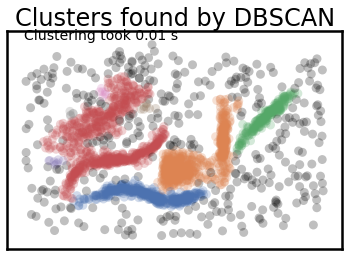

In [19]:
plot_clusters(data, cluster.DBSCAN, (),{'eps':0.025})

#import hdbscan
#plot_clusters(data, hdbscan.HDBSCAN, (), ('min_cluster_size':15)) (slower a bit than dbscan)